## Encontre a resposta toal de um sistema de 1 Grau de Liberdade com :

m = 10 [kg] ; c = 20 [N*s/m] ; k = 4000 [N/m]; x_0 = 0,001 [m] ; x_ponto_0 = 0,

sob as seguintes condições: 

A) Uma força externa de f(t) = 100*np.cos(10*t)

B) Vibração livre amortecida f(t) = 0

c) Compare x_0 e phi_0 obtidos nos itens A) e B)

## A) Uma força externa de f(t) = 100*np.cos(10*t)

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as signal 
from scipy import *
import sympy as sy

In [74]:
# Características do corpo

m = 10.0     # [kg*m]
c_t = 20.0   # [N*s/m]
k_t = 4000.0 # [N/m]
t = np.linspace(0, 11, 200)
c_c = 2*np.sqrt(k_t*m) 
w = 10.0 # [rad/s]

# condições iniciais 
pos_0 = 0.001 # [m] 
pos_ponto_0 = 0 # [m] 
f = 100*np.cos(w*t)


#print(t)

In [75]:
# frequencia natural

w_n = np.sqrt(k_t/m)

print('Frequencia Natural é : {} [rad/s]'.format(w_n))

# delta estático

delta_st = f[0]/k_t 

print('Delta é : {} [m]'.format(delta_st))

# Fator de Amortecimento

zeta = c_t/c_c

print('Fator de Amortecimento é : {} '.format(zeta))

# frequencia Natural Amortecida

w_d = w_n*np.sqrt(1-zeta**2)

print('Frequencia Natural Amortecida é : {} [rad/s]'.format(w_n))

#Razão
r = w/w_n







Frequencia Natural é : 20.0 [rad/s]
Delta é : 0.025 [m]
Fator de Amortecimento é : 0.05 
Frequencia Natural Amortecida é : 20.0 [rad/s]


In [76]:
# Calculo das constantes da equacao caracteristica



x_1 = delta_st/(1 - r**2)
phi_1 = np.arctan((2*zeta*r)/(1-r**2)) #valor em radianos

# resolucao numerica das outras constantes :
    # pos_ponto_0 = -zeta*w_n*x_0 + w_d*x_0*sen(phi_0) + w*x_1*sen(phi_1)

        # x_0*sen(phi_0) = -0,002268

    # pos_0 = x_0*cos(phi_0) + x_1*cos(phi_1)

        # x_0*cos(phi_0) = -0,023

    # x_0 = np.sqrt((x_0*cos(phi_0)**2 + (x_0*sin(phi_0)**2)

    #tg(phi_0) = x_0*sen(phi_0)/x_0*cos(phi_0)

x_0 = 0.0232
phi_0 = 0.097506 #valor em radianos




In [77]:
pos = x_0*np.exp(-zeta*w_n*t)*np.cos(w_d*t - phi_0) + x_1*np.cos(w*t - phi_1)

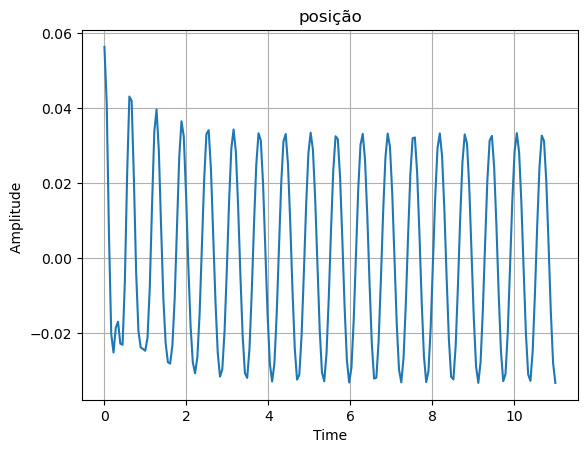

In [84]:
plt.plot(t, pos)
plt.xlabel('Time')
plt.ylabel('Amplitude ')
plt.title('posição')
plt.grid(True)
plt.show()

## B) Vibração livre amortecida f(t) = 0

In [79]:
# eq é dada por pos = x_0*np.exp(-zeta*w_n*t)*np.cos(w_d*t - phi_0)

#cálculo das constantes

x_0_b = np.sqrt(pos_0**2 + (zeta*w_n*pos_0/w_d)**2)

phi_0_b = np.arctan((-pos_ponto_0 + zeta*w_n*pos_0)/(w_d*pos_0))

pos_b = x_0*np.exp(-zeta*w_n*t)*np.cos(w_d*t - phi_0)

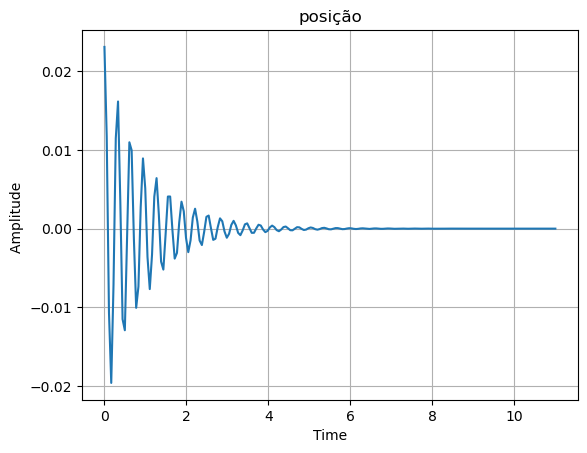

In [80]:
plt.plot(t, pos_b)
plt.xlabel('Time')
plt.ylabel('Amplitude ')
plt.title('posição')
plt.grid(True)
plt.show()

## c) Compare x_0 e phi_0 obtidos nos itens A) e B)

In [81]:
print('x_0_a = {}, x_0_b = {} '.format(x_0,x_0_b))
print('phi_0_a = {}, phi_0_b = {} '.format(phi_0,phi_0_b))

x_0_a = 0.0232, x_0_b = 0.0010012523486435177 
phi_0_a = 0.097506, phi_0_b = 0.05002085680577002 
